In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [44]:
# generate data for logistic regression

# generate data for logis
X = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
# generate labels
y = np.array([0, 0, 0, 1, 1, 1])


In [52]:
# function for logistic regression
"""The input of sigmoid function is: X * w + b (dot product)"""
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# loss function
def loss(X, y, w, b):
    return -np.sum(y * np.log(sigmoid(X.dot(w) + b))
                   + (1-y) * np.log(1 - sigmoid(X.dot(w) + b)))
# cost function ~ average loss
def cost(X, y, w, b):
    return -1/X.shape[0] * loss(X, y, w, b)

"""
Goal: To minimize the cost function, we need to calculate the gradient 
    ~ Partial derivative of the cost function
"""

def derivative_w(X, y, w, b):
    return np.sum((sigmoid(X.dot(w) + b) - y) * X.T, axis=1) * 1/X.shape[0]
def derivative_b(X, y, w, b):
    return np.sum((sigmoid(X.dot(w) + b) - y)) * 1/X.shape[0]

def gradient_descent(X, y, w, b, learning_rate):
    for i in range(10000):
        w = w - learning_rate * derivative_w(X, y, w, b)
        b = b - learning_rate * derivative_b(X, y, w, b)
    return w, b


In [53]:
w_trained, b_trained = gradient_descent(X, y, np.random.randn(2), np.random.randn(1), 0.01)
print("This is w_trained:{}, b_trained:{}".format(w_trained, b_trained))

This is w_trained:[2.40082133 2.17445563], b_trained:[-6.18185877]


In [57]:
print("This is the cost: {}".format(cost(X, y, w_trained, b_trained)))
X_test = np.array([[0.5, 0.5]])
pred = sigmoid(X_test.dot(w_trained) + b_trained)
if pred > 0.5:
    print("Predicted label: {} - probability to be 1:{}".format(1, pred))
else:
    print("Predicted label: {} - probability to be 0:{}".format(0, 1-pred))


This is the cost:-0.14829898569353606
Predicted label: 0 - probability to be 0:[0.98004699]


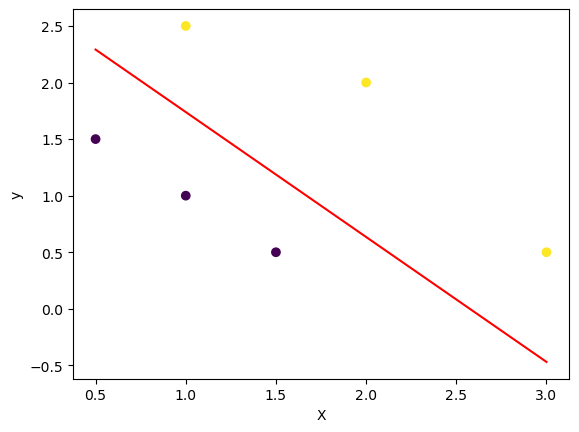

In [59]:
"""
The decision boundary: z = w.dot(x) + b = 0
    => w_trained.dot(x) + b_trained = 0
"""
x_decision = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_decision = -(w_trained[0] * x_decision + b_trained) / w_trained[1]

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(x_decision, y_decision, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()
